___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [152]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [153]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [155]:
import tensorflow as tf
from tensorflow import keras

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [157]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [158]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [159]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [160]:
x_train.shape

(60000, 28, 28)

In [161]:
x_test.shape

(10000, 28, 28)

In [162]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=SEED)

In [163]:
x_val.shape

(6000, 28, 28)

In [164]:
y_val.shape

(6000,)

In [165]:
x_train.shape

(54000, 28, 28)

In [166]:
y_train.shape

(54000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [167]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [168]:
x_train[5].shape

(28, 28)

In [169]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67,
        121,   8],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,  46,  53,  38,  17,  21,  27,  26,  14,   4,   0,  38,
        104,  68],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1,
          0,   3, 131, 116, 136, 139, 136, 146, 148, 155, 156, 148, 141,
        134,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  19, 120, 111, 124, 141, 136, 135, 143, 150, 159, 165, 167,
        128,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,
          0,  58, 125, 119, 138, 145, 119, 135, 140, 144, 159, 146, 175,
         69,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0, 110, 123, 118, 124, 144, 135, 159, 138, 151, 160, 145, 171,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   1,   0,
         52, 135, 105, 118, 123, 156, 130, 135, 136, 164, 165, 153, 167,
         60,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   2,   2,   0,   8,
        115, 114, 115, 130, 124, 143, 134, 139, 146, 157, 162, 155, 169,
         97,   0],
       [  0,   0,   0,   1,   1,   1,   0,   0,   0,   1,   0,   1,  95,
        119, 102, 108, 125, 115, 138, 148, 141, 150, 146, 151, 160, 167,
        143,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   1,  70, 108,
        104, 110, 113, 125, 126, 135, 148, 139, 148, 151, 154, 160, 165,
        171,   0],
       [  0,   0,   0,   0,   2,   2,   2,   0,   0,   1,  77, 115,  99,
         99, 118, 121, 126, 131, 128, 159, 154, 141, 150, 151, 146, 151,
        187,  29],
       [  1,   0,   4,   3,   2,   0,   0,   0,   3,  89, 114,  90, 100,
        102, 114, 126, 123, 136, 121, 144, 144, 141, 149, 139, 141, 134,
        179,  60],
       [  1,   0,   0,   0,   0,   1,   6,  32,  98, 102,  99, 105,  84,
        113, 126, 134, 138, 139, 121, 120, 143, 151, 139, 153, 154, 154,
        175,  77],
       [  0,   2,  41,  69,  79,  85,  97,  88,  87,  87, 104, 113, 108,
        110, 121, 126, 118, 116, 130, 131, 154, 135, 129, 144, 135, 129,
        160,  46],
       [  2,  48, 100, 110, 109, 102, 111, 105, 106, 110, 110, 103, 115,
        110, 124, 126, 108, 133, 136, 167, 190, 192, 197, 202, 200, 200,
        211,  59],
       [114, 182, 120,  95,  90,  73,  78,  84,  94,  87,  82,  85,  89,
         90, 134, 171, 216, 235, 240, 208, 230, 235, 235, 235, 233, 233,
        221,   9],
       [ 11, 121, 177, 187, 179, 196, 167, 140, 131, 121, 123, 166, 189,
        220, 233, 213, 169,  75,   3,   0, 228, 255, 246, 250, 245, 255,
        210,   0],
       [  0,   0,   0,   8,  79, 114, 157, 184, 196, 205, 207, 195, 170,
        109,  16,   0,   0,   0,   0,   0, 139, 123, 114, 114, 103, 128,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

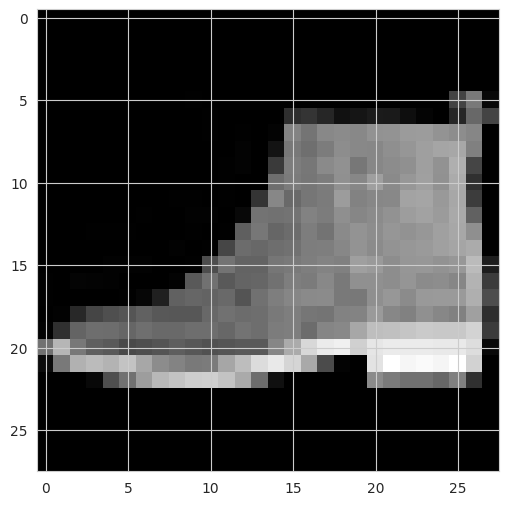

In [170]:
plt.imshow(x_train[5], cmap="gray")
plt.show()

<Axes: >

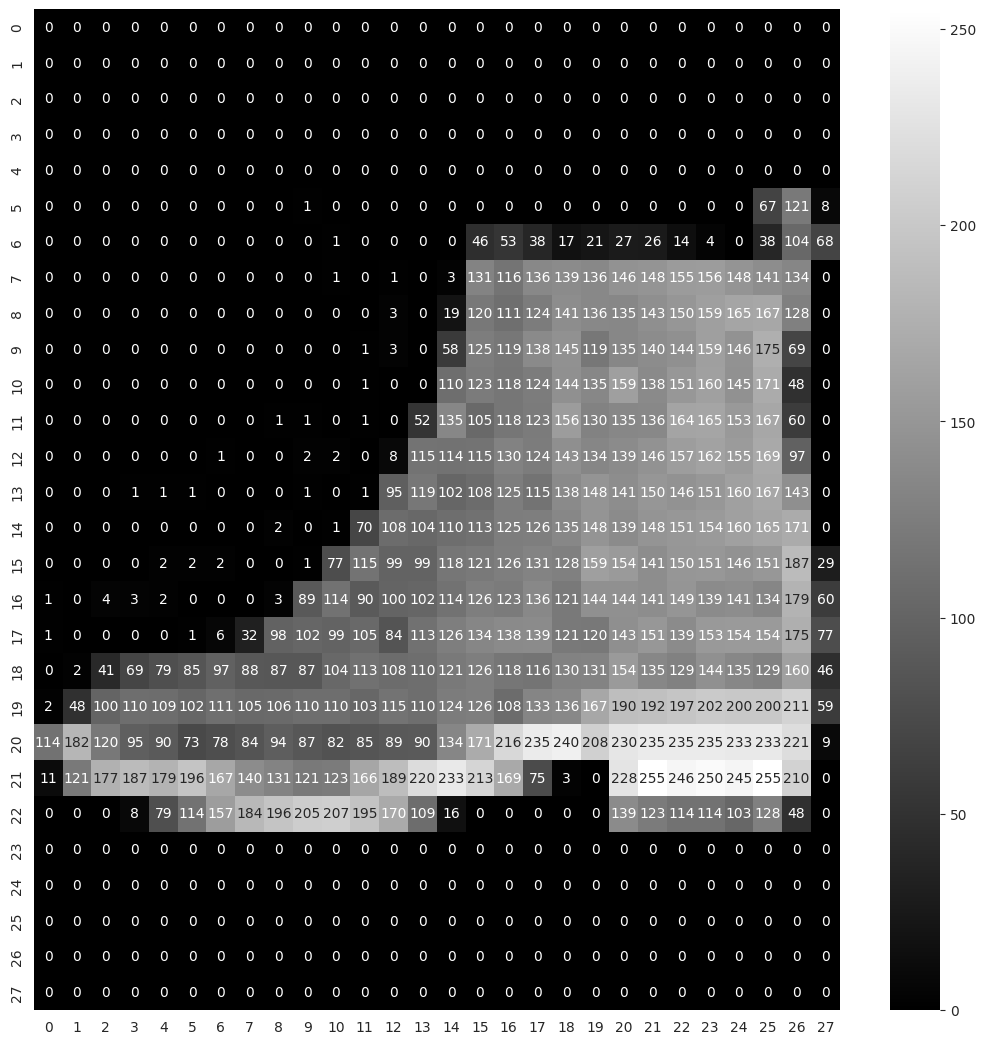

In [171]:
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[5], annot=True, cmap="gray", fmt=".3g")

In [172]:
y_train[5]

9

In [173]:
y_train.shape

(54000,)

In [174]:
y_train

array([5, 2, 9, ..., 6, 6, 1], dtype=uint8)

In [175]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5403, 5392, 5389, 5413, 5373, 5379, 5381, 5450, 5410, 5410]))

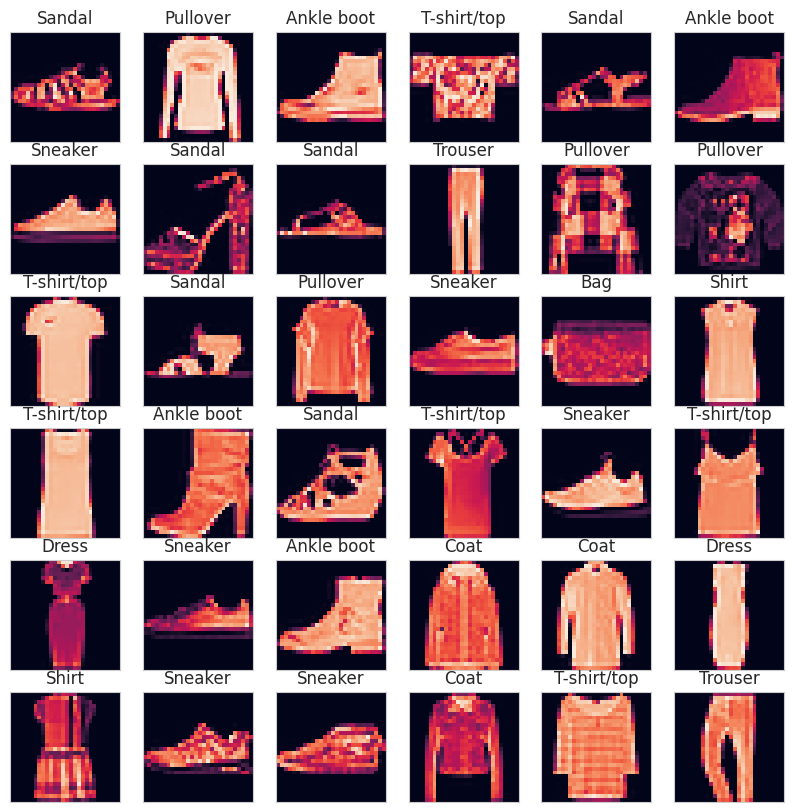

In [176]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(classes[label_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train, X test and X validation data by dividing by the max value of the image arrays.**

In [177]:
x_train[342].min()

0

In [178]:
x_train[342].max()

255

In [179]:
# Normalize image pixels
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_val = x_val.astype("float32")
X_train /= 255
X_test /= 255
X_val /= 255

In [180]:
X_train[342].min()

0.0

In [181]:
X_train[342].max()

1.0

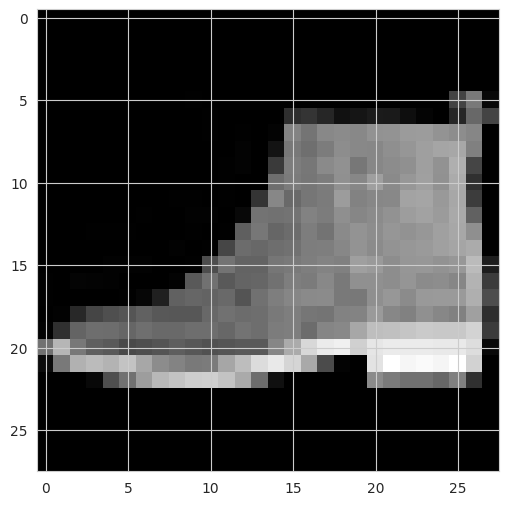

In [182]:
plt.imshow(X_train[5], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [183]:
X_train.shape, X_test.shape, X_val.shape

((54000, 28, 28), (10000, 28, 28), (6000, 28, 28))

In [184]:
np.expand_dims(X_train, 3).shape

(54000, 28, 28, 1)

In [185]:
np.expand_dims(X_test, 3).shape

(10000, 28, 28, 1)

In [186]:
np.expand_dims(X_val, 3).shape

(6000, 28, 28, 1)

In [187]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)
X_val = np.expand_dims(X_val, 3)

In [188]:
X_train.shape, X_test.shape, X_val.shape

((54000, 28, 28, 1), (10000, 28, 28, 1), (6000, 28, 28, 1))

**TASK 5: Convert the y_train, y_test and y_val values to be one-hot encoded for categorical analysis by Keras.**

In [189]:
y_train

array([5, 2, 9, ..., 6, 6, 1], dtype=uint8)

In [190]:
y_train.shape

(54000,)

In [191]:
from tensorflow.keras.utils import to_categorical

In [192]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_val = to_categorical(y_val, 10)
Y_train.shape

(54000, 10)

In [193]:
y_train[5]

9

In [194]:
Y_train[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [196]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [197]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 17500)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2240128   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [198]:
from tensorflow.keras.callbacks import EarlyStopping

In [199]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=4, restore_best_weights=True)

In [200]:
model.fit(
    X_train,
    Y_train,
    batch_size=36,
    epochs=100,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/100
1500/1500 [==============================] - 78s 52ms/step - loss: 0.3978 - accuracy: 0.8589 - val_loss: 0.3057 - val_accuracy: 0.8863
Epoch 2/100
1500/1500 [==============================] - 76s 51ms/step - loss: 0.2617 - accuracy: 0.9040 - val_loss: 0.2593 - val_accuracy: 0.9037
Epoch 3/100
1500/1500 [==============================] - 74s 49ms/step - loss: 0.2170 - accuracy: 0.9204 - val_loss: 0.2502 - val_accuracy: 0.9115
Epoch 4/100
1500/1500 [==============================] - 73s 49ms/step - loss: 0.1862 - accuracy: 0.9326 - val_loss: 0.2672 - val_accuracy: 0.9003
Epoch 5/100
1500/1500 [==============================] - 77s 51ms/step - loss: 0.1604 - accuracy: 0.9414 - val_loss: 0.2645 - val_accuracy: 0.9062
Epoch 6/100
1500/1500 [==============================] - 74s 50ms/step - loss: 0.1402 - accuracy: 0.9495 - val_loss: 0.2647 - val_accuracy: 0.9088
Epoch 7/100
1500/1500 [==============================] - 74s 49ms/step - loss: 0.1225 - accuracy: 0.9552 - val_loss: 0

In [201]:
summary = pd.DataFrame(model.history.history)
summary.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.398,0.859,0.306,0.886
1,0.262,0.904,0.259,0.904
2,0.217,0.920,0.250,0.911
3,0.186,0.933,0.267,0.900
4,0.160,0.941,0.264,0.906


**TASK 7: Plot values of metrics you used in your model.**

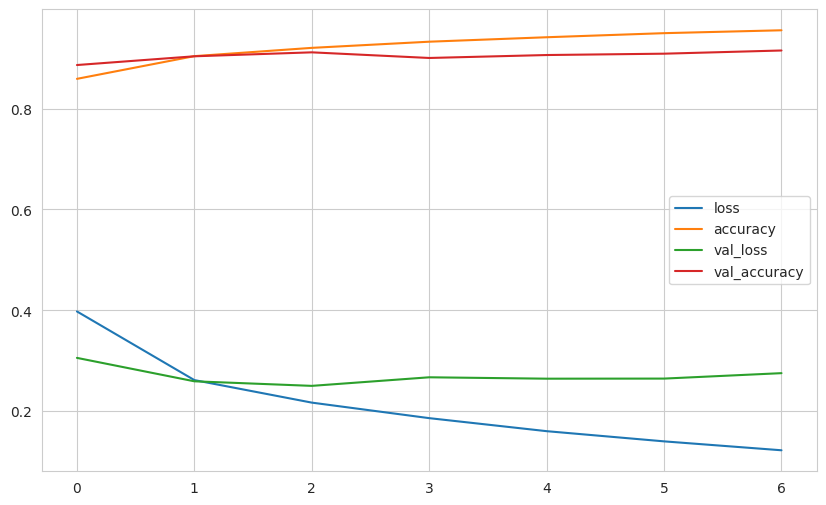

In [202]:
summary.plot();

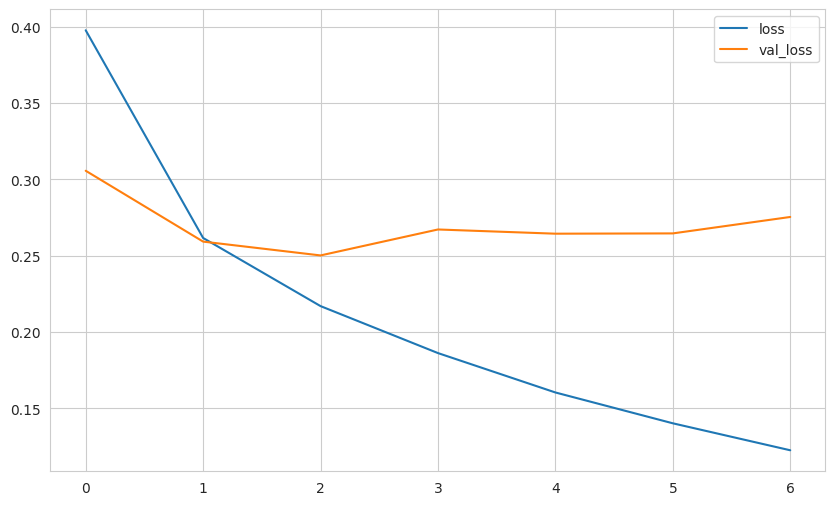

In [203]:
summary[["loss", "val_loss"]].plot()
plt.show()

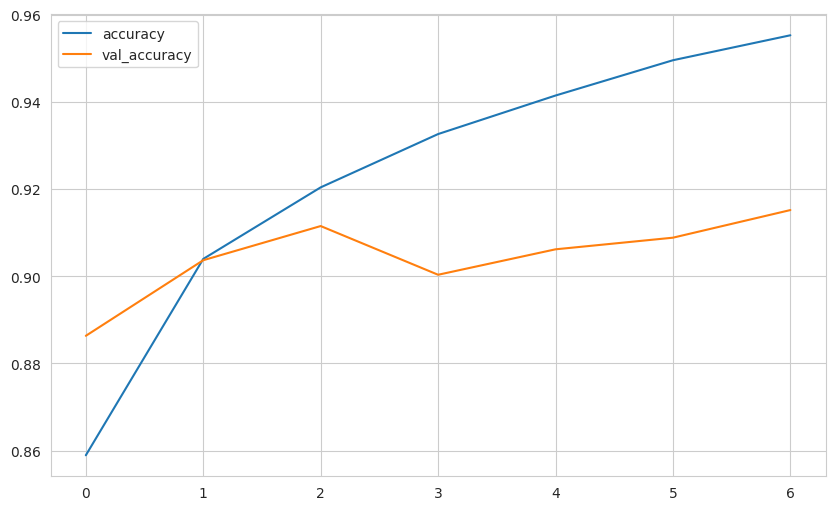

In [204]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [205]:
from sklearn.metrics import classification_report, confusion_matrix

In [206]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2781 - accuracy: 0.9025


[0.2780504524707794, 0.9024999737739563]

In [207]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2780504524707794
Test accuracy: 0.9024999737739563


In [208]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 3s 10ms/step


array([[0.00000042, 0.00000031, 0.00000381, ..., 0.00553267, 0.00000015,
        0.9937984 ],
       [0.00000446, 0.        , 0.9999837 , ..., 0.        , 0.        ,
        0.        ],
       [0.00000006, 0.9999998 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000392, 0.        , 0.00000748, ..., 0.00001154, 0.99969864,
        0.00000001],
       [0.00000013, 0.99998647, 0.        , ..., 0.00000003, 0.        ,
        0.00000054],
       [0.00064345, 0.0000246 , 0.00276437, ..., 0.06403396, 0.00233332,
        0.00114305]], dtype=float32)

In [209]:
y_pred = np.argmax(pred_prob, axis=1)

In [210]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.91      0.90      0.90      1000
           4       0.79      0.89      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.73      0.73      1000
           7       0.93      0.98      0.96      1000
           8       0.99      0.96      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [212]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [213]:
print(confusion_matrix(y_test, y_pred))

[[849   0  14  14   5   2 112   1   3   0]
 [  1 970   0  20   5   0   3   0   1   0]
 [ 15   0 817   5  93   0  70   0   0   0]
 [ 11   3  14 897  48   0  27   0   0   0]
 [  1   1  43  20 893   0  42   0   0   0]
 [  0   0   0   1   0 977   0  15   0   7]
 [ 94   0  58  25  86   0 735   0   2   0]
 [  0   0   0   0   0   6   0 984   0  10]
 [  2   0   1   5   6   3  17   4 962   0]
 [  0   0   0   0   0   7   1  51   0 941]]


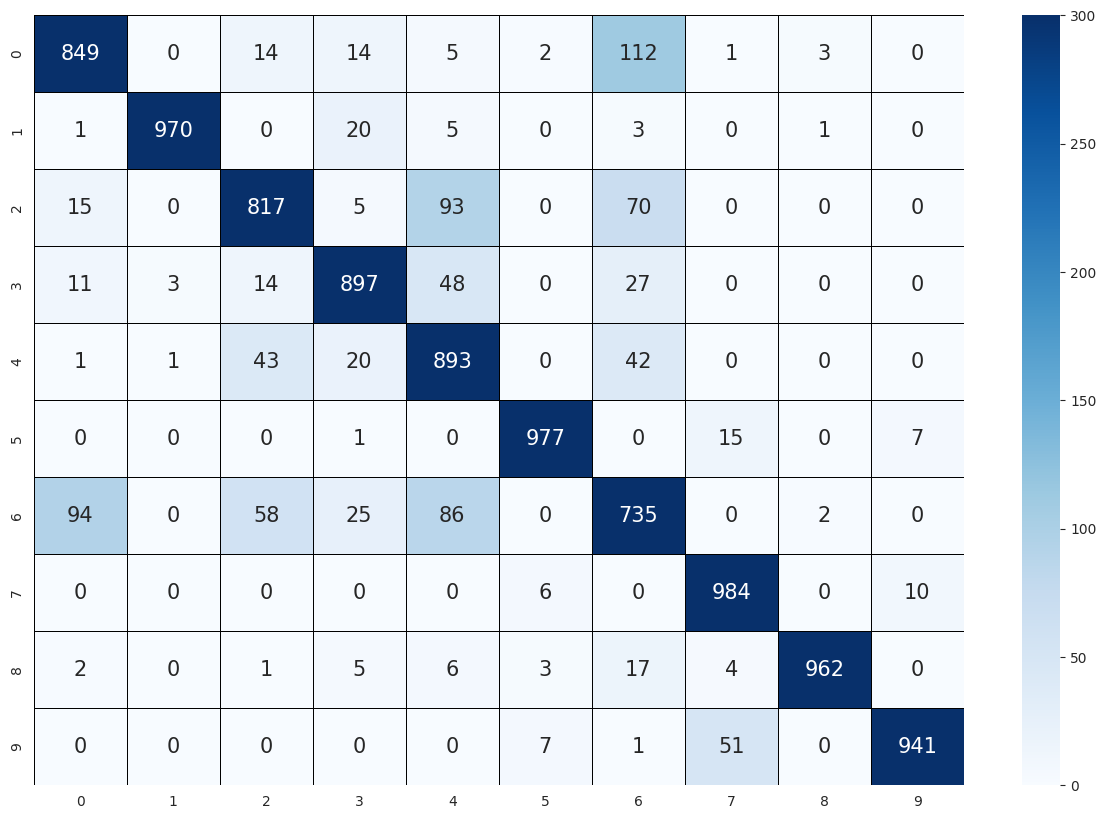

In [214]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

# Adding Dropout

# Modeling

In [215]:
from tensorflow.keras.layers import  Dropout

In [219]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=4, restore_best_weights=True)

In [249]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [265]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 22, 22, 64)       

# Model Training

In [250]:
model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/50
422/422 [==============================] - 567s 1s/step - loss: 0.5772 - accuracy: 0.7944 - val_loss: 0.3465 - val_accuracy: 0.8653
Epoch 2/50
422/422 [==============================] - 564s 1s/step - loss: 0.3383 - accuracy: 0.8781 - val_loss: 0.2738 - val_accuracy: 0.8958
Epoch 3/50
422/422 [==============================] - 564s 1s/step - loss: 0.2867 - accuracy: 0.8974 - val_loss: 0.2594 - val_accuracy: 0.9042
Epoch 4/50
422/422 [==============================] - 550s 1s/step - loss: 0.2560 - accuracy: 0.9081 - val_loss: 0.2478 - val_accuracy: 0.9068
Epoch 5/50
422/422 [==============================] - 556s 1s/step - loss: 0.2360 - accuracy: 0.9147 - val_loss: 0.2619 - val_accuracy: 0.9027
Epoch 6/50
422/422 [==============================] - 549s 1s/step - loss: 0.2149 - accuracy: 0.9205 - val_loss: 0.2121 - val_accuracy: 0.9235
Epoch 7/50
422/422 [==============================] - 555s 1s/step - loss: 0.2020 - accuracy: 0.9269 - val_loss: 0.2096 - val_accuracy: 0.9238

In [251]:
summary = pd.DataFrame(model.history.history)
summary.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.577,0.794,0.346,0.865
1,0.338,0.878,0.274,0.896
2,0.287,0.897,0.259,0.904
3,0.256,0.908,0.248,0.907
4,0.236,0.915,0.262,0.903


# Model Evaluation

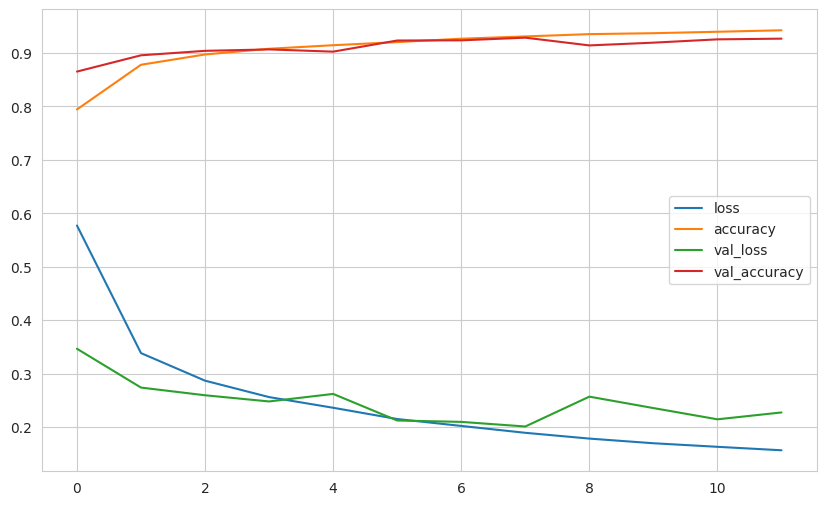

In [252]:
summary.plot();

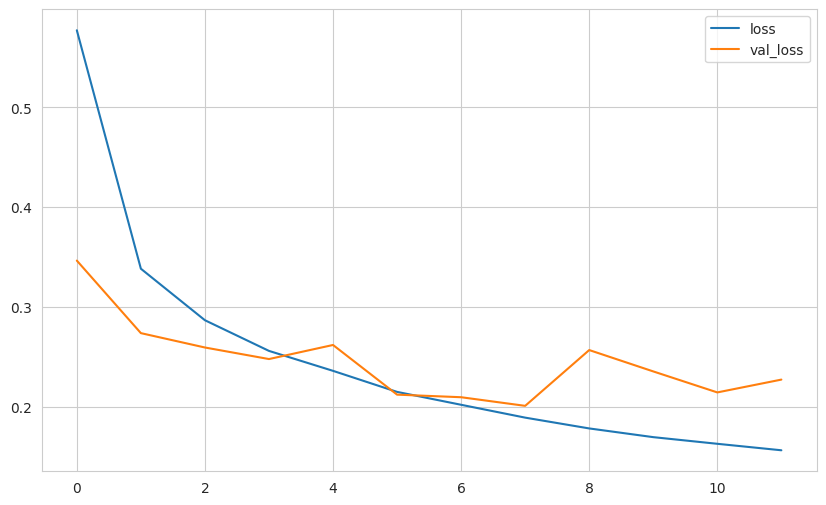

In [253]:
summary[["loss", "val_loss"]].plot()
plt.show()

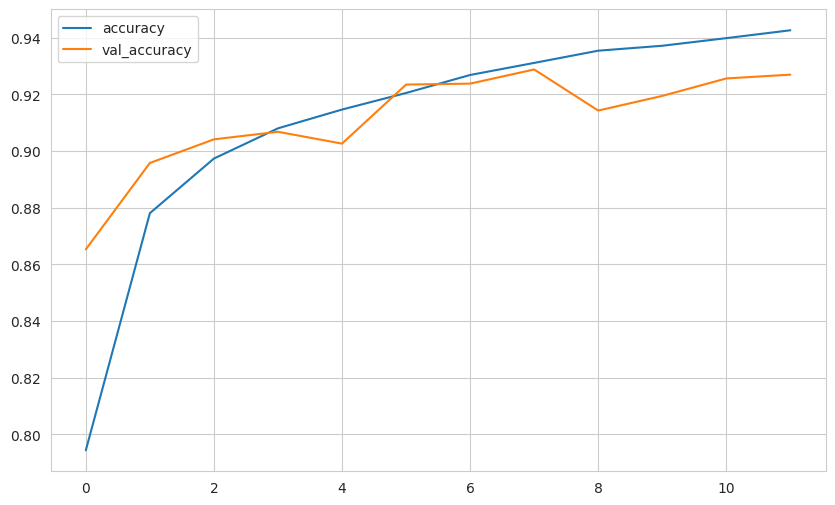

In [254]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [255]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 22s 71ms/step - loss: 0.2169 - accuracy: 0.9228


[0.21688050031661987, 0.9228000044822693]

In [257]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.21688050031661987
Test accuracy: 0.9228000044822693


In [258]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 23s 74ms/step


array([[0.        , 0.        , 0.        , ..., 0.00000001, 0.        ,
        0.9999998 ],
       [0.00000885, 0.        , 0.9993967 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000002, 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.9999998 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00010567, 0.00000772, 0.00001264, ..., 0.00254164, 0.00028996,
        0.00055494]], dtype=float32)

In [259]:
y_pred = np.argmax(pred_prob, axis=1)

In [260]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [261]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.91      0.86      0.88      1000
           3       0.93      0.92      0.92      1000
           4       0.85      0.90      0.88      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.79      0.78      1000
           7       0.98      0.96      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [262]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [263]:
print(confusion_matrix(y_test, y_pred))

[[876   0  11  13   2   1  91   0   6   0]
 [  1 979   0  12   1   0   6   0   1   0]
 [ 14   0 860   4  59   0  62   0   1   0]
 [ 11   1   8 915  37   0  27   0   1   0]
 [  0   0  24  18 901   0  55   0   2   0]
 [  0   0   0   0   0 989   0   5   0   6]
 [ 91   0  42  17  55   0 790   0   5   0]
 [  0   0   0   0   0  12   0 963   0  25]
 [  2   1   5   3   3   4   2   0 980   0]
 [  1   0   0   0   0   5   0  19   0 975]]


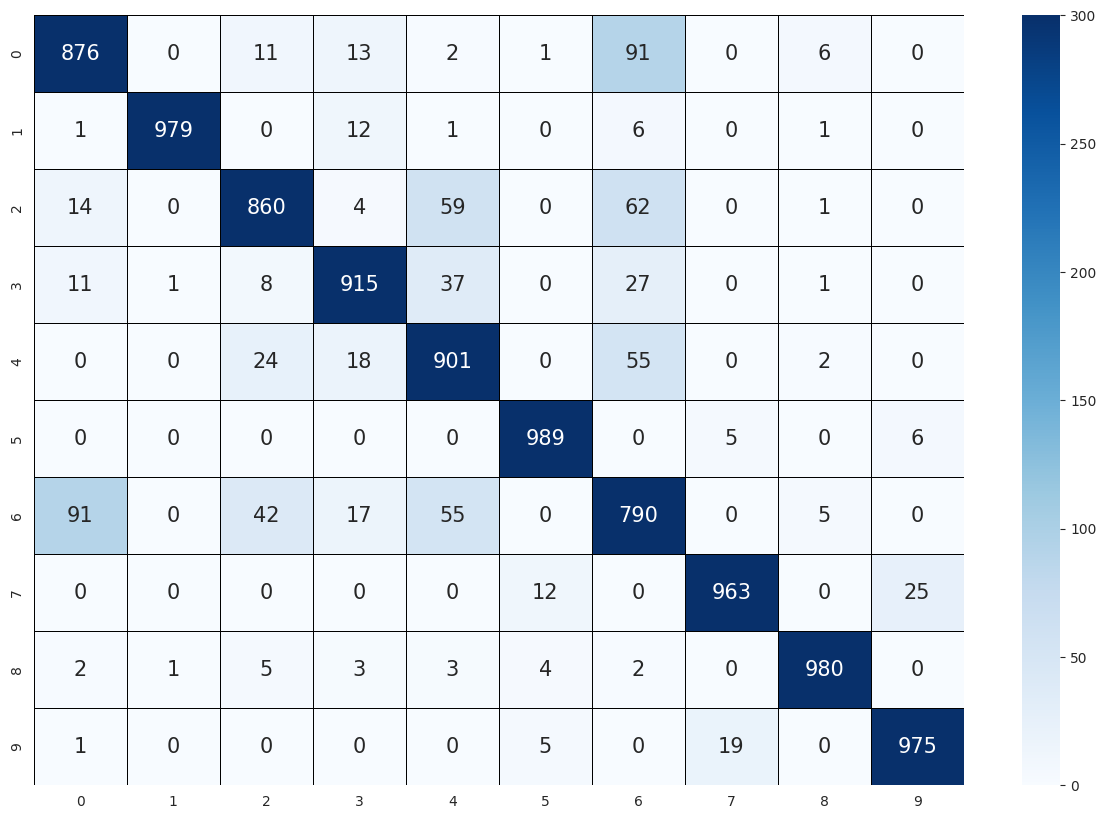

In [264]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

In [266]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [267]:
np.not_equal(y_test, y_pred).sum()

772

In [268]:
np.equal(y_test, y_pred).sum()

9228

## Prediction

In [272]:
my_image = X_test[40]

In [273]:
my_image.shape

(28, 28, 1)

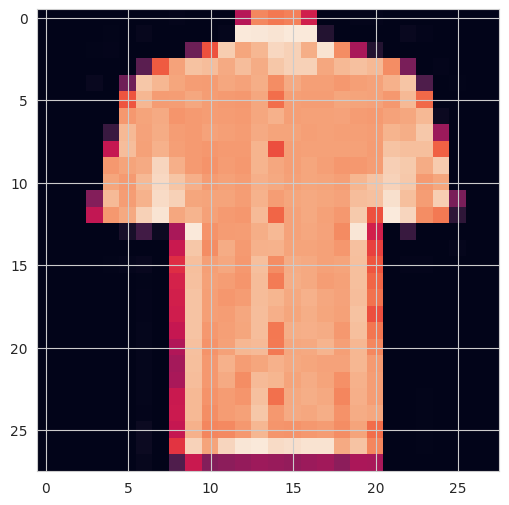

In [274]:
plt.imshow(my_image)
plt.show()

In [276]:
np.expand_dims(my_image, 0).shape

(1, 28, 28, 1)

In [277]:
pred_prob = model.predict(np.expand_dims(my_image, 0))
pred_prob

1/1 [==============================] - 0s 98ms/step


array([[0.02194105, 0.        , 0.00000077, 0.00000019, 0.00001206,
        0.        , 0.9780458 , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [278]:
y_pred = np.argmax(pred_prob)
y_pred

6

In [279]:
y_test[40]

6

In [290]:
classes[y_test[40]]

'Shirt'

In [280]:
model.save("cnn-fashion-mnist.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [281]:
model = tf.keras.models.load_model("cnn-fashion-mnist.h5")

In [286]:
pred = model.predict(np.expand_dims(X_test[20], 0))

1/1 [==============================] - 0s 142ms/step


In [287]:
np.argmax(pred)

2

In [289]:
classes[y_test[20]]

'Pullover'

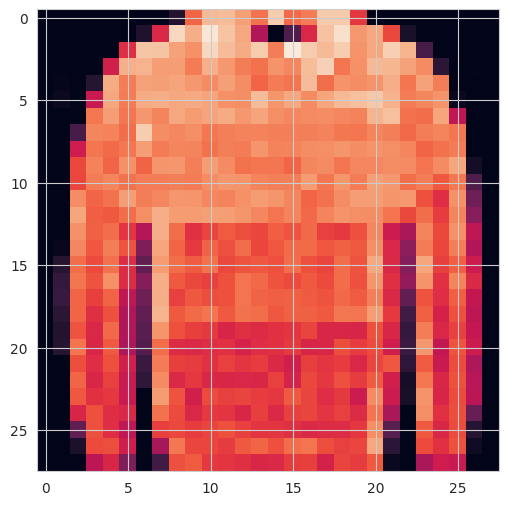

In [288]:
plt.imshow(X_test[20].reshape(28, 28))
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___